In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\sures\\OneDrive\\Desktop\\PROJECT\\superstore.csv', index_col='Row ID', encoding='windows-1254')
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [3]:
df.shape

(9994, 20)

In [4]:
df.columns = ['OrderID','OrderDate', 'ShipDate', 'ShipMode', 'CustomerID', 'CustomerName', 'Segment' ,
                         'Country', 'City', 'State', 'PostalCode', 'Region', 'ProductID', 'Category', 'SubCategory',
                         'ProductName' , 'DiscountedSales', 'Quantity', 'Discount(%)', 'Profit']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          9994 non-null   object 
 1   OrderDate        9994 non-null   object 
 2   ShipDate         9994 non-null   object 
 3   ShipMode         9994 non-null   object 
 4   CustomerID       9994 non-null   object 
 5   CustomerName     9994 non-null   object 
 6   Segment          9994 non-null   object 
 7   Country          9994 non-null   object 
 8   City             9994 non-null   object 
 9   State            9994 non-null   object 
 10  PostalCode       9994 non-null   int64  
 11  Region           9994 non-null   object 
 12  ProductID        9994 non-null   object 
 13  Category         9994 non-null   object 
 14  SubCategory      9994 non-null   object 
 15  ProductName      9994 non-null   object 
 16  DiscountedSales  9994 non-null   float64
 17  Quantity      

In [6]:
duplicates = df.duplicated(keep = False)
duplicates.sum()

2

In [7]:
# Sort your duplicated sales to see duplicated values
duplicated_sales = df[duplicates].sort_values('Row ID')
duplicated_sales

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,DiscountedSales,Quantity,Discount(%),Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3407,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [8]:
df.drop_duplicates(keep = 'first',ignore_index = True,inplace=True)
df.duplicated(keep = False).unique() 
df.duplicated().sum()

0

In [9]:
df['OrderID'].describe() 

count               9993
unique              5009
top       CA-2017-100111
freq                  14
Name: OrderID, dtype: object

In [10]:
df['OrderID'].dtype   

dtype('O')

In [11]:
df['OrderDate'].dtype  #checking the datatype of the OrderDate Column

dtype('O')

In [12]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])   # Converting into the date to the correct datatype
df['OrderDate'].dtype

dtype('<M8[ns]')

In [13]:
df['ShipDate'] = pd.to_datetime(df['ShipDate'])    #checking the datatype of the ShipDate Column
df['ShipDate'].dtype

dtype('<M8[ns]')

In [14]:
df['ShipMode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [15]:
df['ShipMode'] = df['ShipMode'].astype('category')    # Changing to datatype to category
df['ShipMode'].dtype

CategoricalDtype(categories=['First Class', 'Same Day', 'Second Class', 'Standard Class'], ordered=False)

In [16]:
df['ShipMode'].describe()   #summary statistcs of the ShipMode Column

count               9993
unique                 4
top       Standard Class
freq                5967
Name: ShipMode, dtype: object

In [17]:
df['CustomerID'].nunique()

793

In [18]:
df['CustomerID'].describe()    #checking summary statistics of the Customer ID column

count         9993
unique         793
top       WB-21850
freq            37
Name: CustomerID, dtype: object

In [19]:
df['CustomerName'].describe()   #checking summary statistics of the Customer Name column

count              9993
unique              793
top       William Brown
freq                 37
Name: CustomerName, dtype: object

In [20]:
df['Segment'].describe()    #checking summary statistics of the Segment column

count         9993
unique           3
top       Consumer
freq          5191
Name: Segment, dtype: object

In [21]:
df['Segment'] = df['Segment'].astype('category')  #changing the datatype of the segment column from object to category dtype
df['Segment'].dtype

CategoricalDtype(categories=['Consumer', 'Corporate', 'Home Office'], ordered=False)

In [22]:
df['City'].describe()      #checking summary statistics of the City column

count              9993
unique              531
top       New York City
freq                915
Name: City, dtype: object

In [23]:
df['State'].describe()     #checking summary statistics of the State column    

count           9993
unique            49
top       California
freq            2001
Name: State, dtype: object

In [24]:
df['PostalCode'] = df['PostalCode'].astype('str')   # Changing PostalCode from int to str
df['PostalCode'].describe()       #checking summary statistics of the PostalCode column

count      9993
unique      631
top       10035
freq        263
Name: PostalCode, dtype: object

In [25]:
df['Region'].describe()        #checking summary statistics of the Region column    

count     9993
unique       4
top       West
freq      3203
Name: Region, dtype: object

In [26]:
df['ProductID'].describe()      #checking summary statistics of the ProductID column

count                9993
unique               1862
top       OFF-PA-10001970
freq                   19
Name: ProductID, dtype: object

In [27]:
df['ProductName'].describe()    #checking summary statistics of the ProductName column

count                9993
unique               1850
top       Staple envelope
freq                   48
Name: ProductName, dtype: object

In [28]:
df['Category'].describe()  #checking summary statistics of the Category column

count                9993
unique                  3
top       Office Supplies
freq                 6026
Name: Category, dtype: object

In [29]:
df['Category'] = df['Category'].astype('category')  #change datatype of Category column to category datatype
df['Category']

0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9988          Furniture
9989          Furniture
9990         Technology
9991    Office Supplies
9992    Office Supplies
Name: Category, Length: 9993, dtype: category
Categories (3, object): ['Furniture', 'Office Supplies', 'Technology']

In [30]:
df['SubCategory'].describe()      #checking summary statistics of the SubCategory column

count        9993
unique         17
top       Binders
freq         1523
Name: SubCategory, dtype: object

In [31]:
df['SubCategory'] = df['SubCategory'].astype('category')   #change dataype of SubCategory Column
df['SubCategory']

0         Bookcases
1            Chairs
2            Labels
3            Tables
4           Storage
           ...     
9988    Furnishings
9989    Furnishings
9990         Phones
9991          Paper
9992     Appliances
Name: SubCategory, Length: 9993, dtype: category
Categories (17, object): ['Accessories', 'Appliances', 'Art', 'Binders', ..., 'Phones', 'Storage', 'Supplies', 'Tables']

In [32]:
df['DiscountedSales'].describe()  #summary statistics of DiscountedSales Column

count     9993.000000
mean       229.852846
std        623.276074
min          0.444000
25%         17.280000
50%         54.480000
75%        209.940000
max      22638.480000
Name: DiscountedSales, dtype: float64

In [33]:
df['Quantity'].describe()        #summary statistics of Quantity Column

count    9993.000000
mean        3.789753
std         2.225149
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

In [34]:
df['Discount(%)'].describe()       #summary statistics of DiscountAmount Column

count    9993.000000
mean        0.156188
std         0.206457
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount(%), dtype: float64

In [35]:
df['Profit'].describe()             #summary statistics of Profit Column

count    9993.000000
mean       28.660971
std       234.271476
min     -6599.978000
25%         1.731000
50%         8.671000
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

In [36]:
df.describe()

,DiscountedSales,Quantity,Discount(%),Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [37]:
df.describe(include = np.object)

C:\Users\sures\AppData\Local\Temp\ipykernel_20712\132456613.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include = np.object)


,OrderID,CustomerID,CustomerName,Country,City,State,PostalCode,Region,ProductID,ProductName
count,9993,9993,9993,9993,9993,9993,9993,9993,9993,9993
unique,5009,793,793,1,531,49,631,4,1862,1850
top,CA-2017-100111,WB-21850,William Brown,United States,New York City,California,10035,West,OFF-PA-10001970,Staple envelope
freq,14,37,37,9993,915,2001,263,3203,19,48


In [38]:
df_month = df["OrderDate"].dt.month_name()   #adding a month column
df.insert(loc = 3, column = 'OrderMonth', value = df_month)

In [39]:
df_year = pd.DatetimeIndex(df['OrderDate']).year  #adding a new column called Year 
df.insert(loc = 4, column = 'OrderYear', value = df_year)

In [40]:
df['OrderYear'] = df['OrderYear'].astype('str')  #changing OrderYear column from integer to string
df['OrderYear']

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9988    2014
9989    2017
9990    2017
9991    2017
9992    2017
Name: OrderYear, Length: 9993, dtype: object

In [41]:
original_sales = (1/(1-df['Discount(%)']))*df['DiscountedSales']
original_sales

0        261.96
1        731.94
2         14.62
3       1741.05
4         27.96
         ...   
9988      31.56
9989      91.96
9990     323.22
9991      29.60
9992     243.16
Length: 9993, dtype: float64

In [42]:
df['OriginalSales'] = original_sales

In [43]:
df['UnitPrice'] = original_sales/df['Quantity']
df['UnitPrice']

0       130.98
1       243.98
2         7.31
3       348.21
4        13.98
         ...  
9988     10.52
9989     45.98
9990    161.61
9991      7.40
9992    121.58
Name: UnitPrice, Length: 9993, dtype: float64

In [44]:
df_cost_price = df['DiscountedSales'] - df['Profit']
df_cost_price

0        220.0464
1        512.3580
2          7.7486
3       1340.6085
4         19.8516
          ...    
9988      21.1452
9989      76.3268
9990     239.1828
9991      16.2800
9992     170.2120
Length: 9993, dtype: float64

In [45]:
df['CostPrice'] = df_cost_price #Calculating Discounted Amount of each product and adding it to the dataset as a new column

In [46]:
df['DiscountedAmount'] = df['OriginalSales'] - df['DiscountedSales'] #Calculating Profit Percentage of each product and adding it to the dataset as a new column

In [47]:
df['Profit%']=(df['Profit']/df['CostPrice'])*100 # With the order date and delivery date columns n the dataset, delivery day lengths were calculated and added as a new column to the dataset

In [48]:
df_interval = df["ShipDate"] - df["OrderDate"]
df_interval = df_interval / np.timedelta64(1,'D')
df.insert(loc = 5, column = 'DeliveryDays', value = df_interval)

In [49]:
df['DeliveryDays'] = df['DeliveryDays'].astype('int')   #changing datatype of deliverydays column from int to str
df['Reliability'] = np.where(df['DeliveryDays'] >= 5, 'Delayed', 'Timely')  #confirmation on whether deliveries were timely or delayed.

### EXPLORATORY DATA ANALYSIS

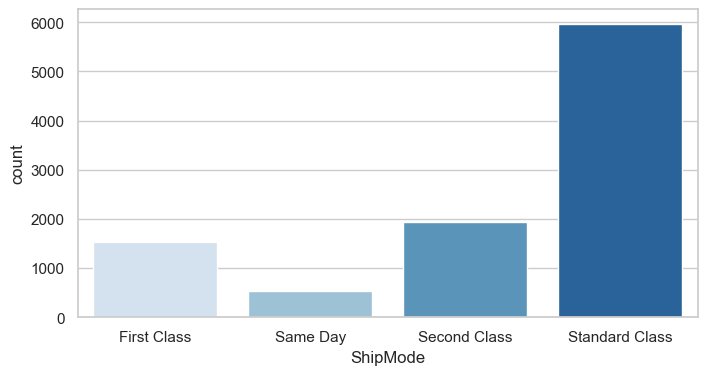

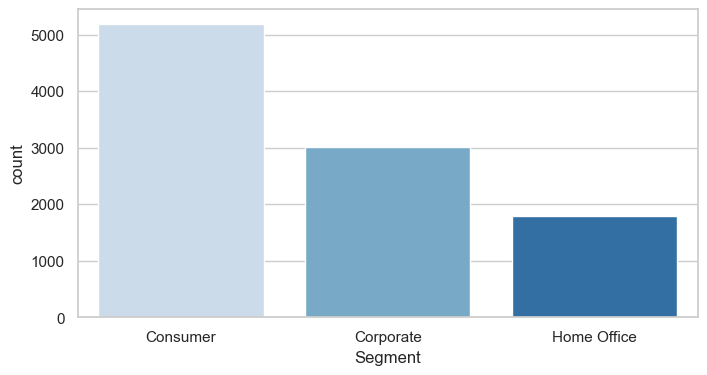

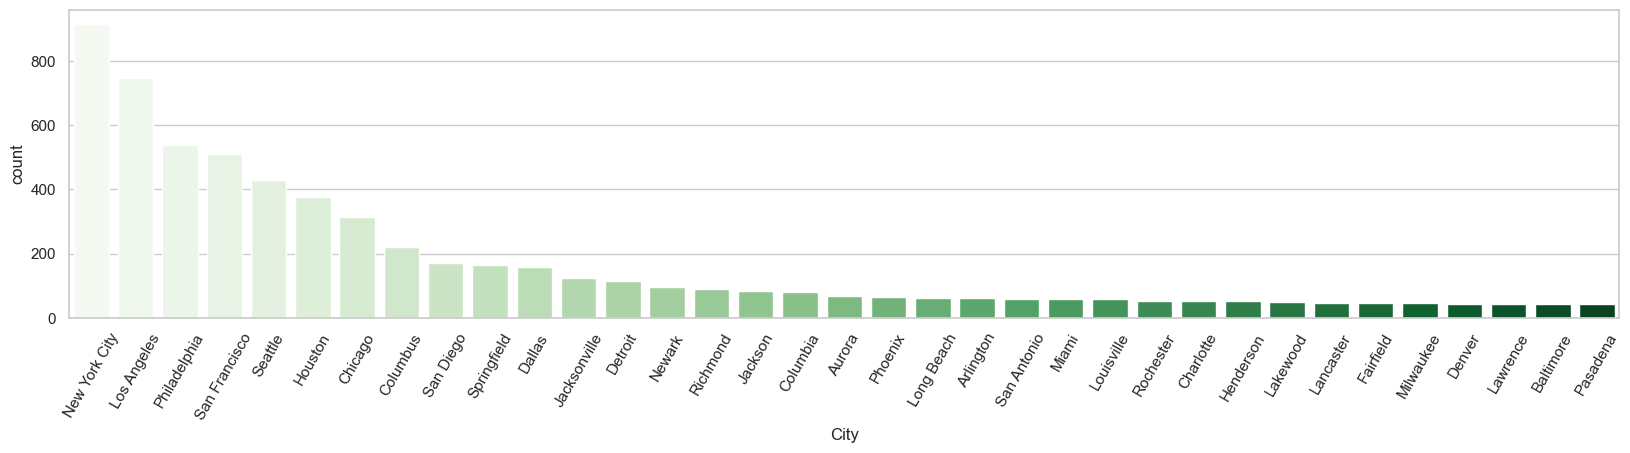

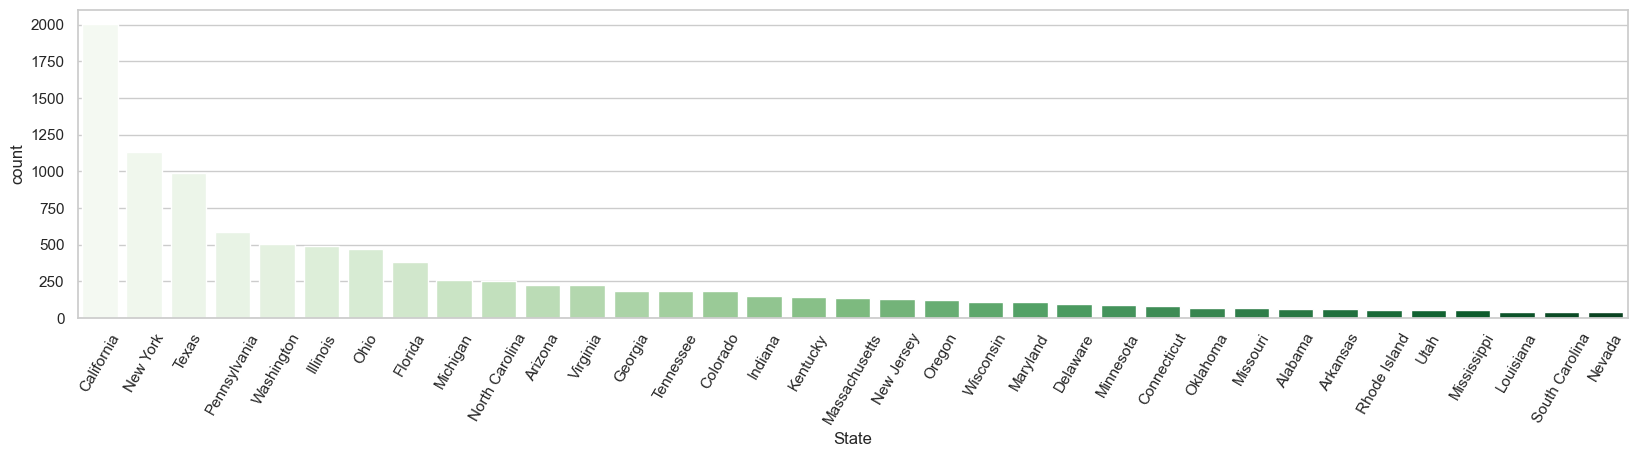

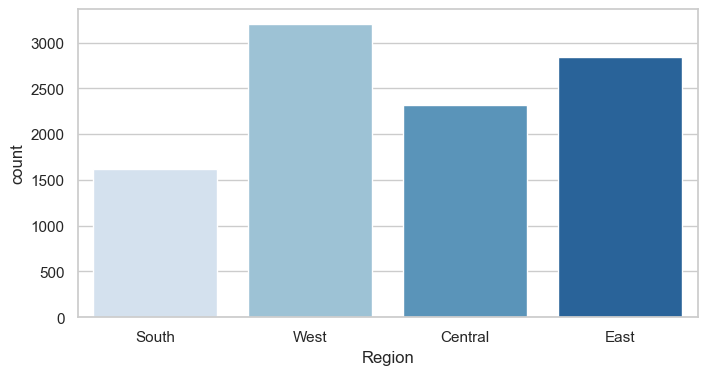

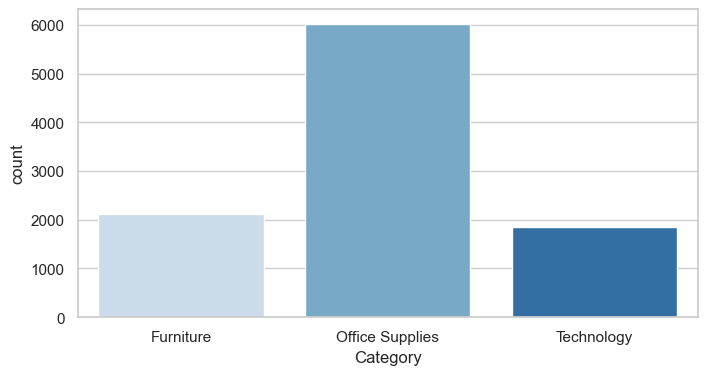

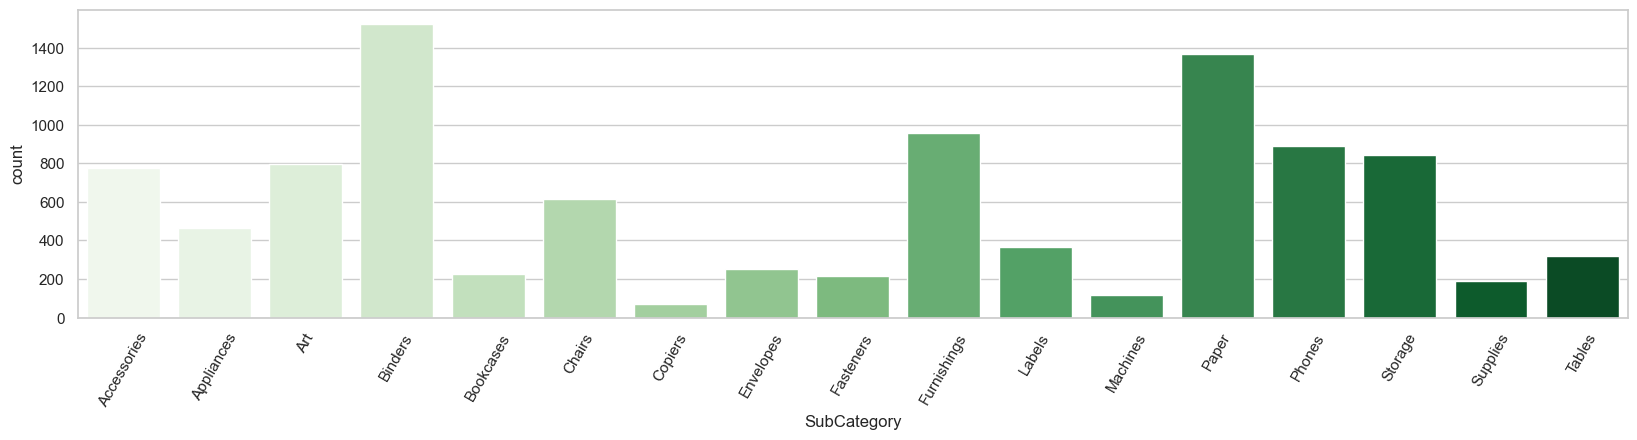

In [71]:
imp_categotical_features=df[['ShipMode','Segment', 'City', 'State','Region','Category', 'SubCategory']]

for col in imp_categotical_features:
    width=8
    n=len(df[col].unique())
    if n > 15:
        width=20
        plt.figure(figsize=(width,4))
        temp=pd.DataFrame(df[col].value_counts().sort_values(ascending=False)[:35],columns=[col])
        sns.barplot(data=temp,x=temp.index,y=col,palette= 'Greens')
        plt.ylabel("count")
        plt.xlabel(col)
        plt.xticks(rotation=60)   
    else:
        plt.figure(figsize=(width,4))
        sns.countplot(data=df,x=col,palette='Blues')
    plt.show()

**COUNT OF SUB-CATEGORY**

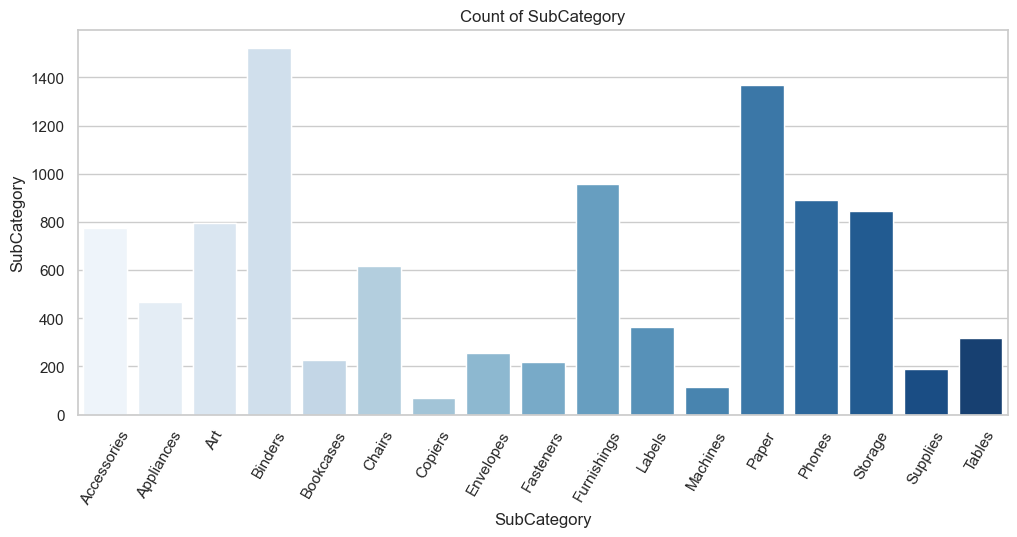

In [72]:
sns.countplot(x='SubCategory', data = df)
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(data=temp,x=temp.index,y=col,palette= 'Blues')
plt.xticks(rotation=60)
plt.title('Count of SubCategory')
plt.show()

**SALES AND PROFIT ANALYSIS**

In [52]:
sales_profit_segment1 = df.groupby('Segment').sum()[['DiscountedSales','Profit']]
sales_profit_segment1 = sales_profit_segment1.reset_index()
sales_profit_segment1

C:\Users\sures\AppData\Local\Temp\ipykernel_20712\2586305887.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_profit_segment1 = df.groupby('Segment').sum()[['DiscountedSales','Profit']]


,Segment,DiscountedSales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.293718e+05,60310.7373


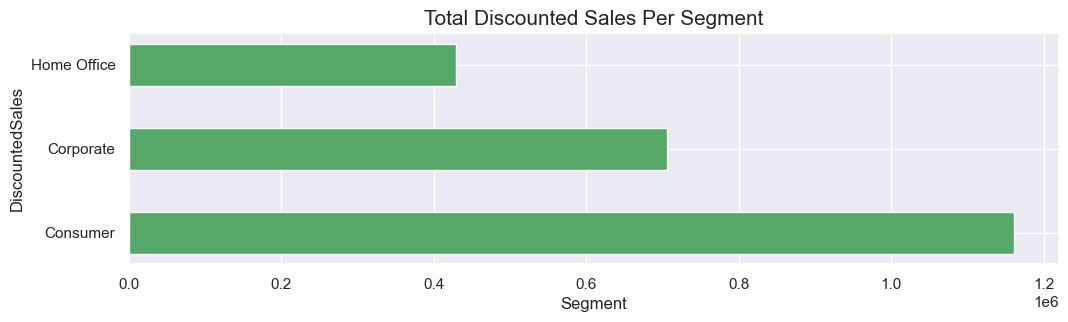

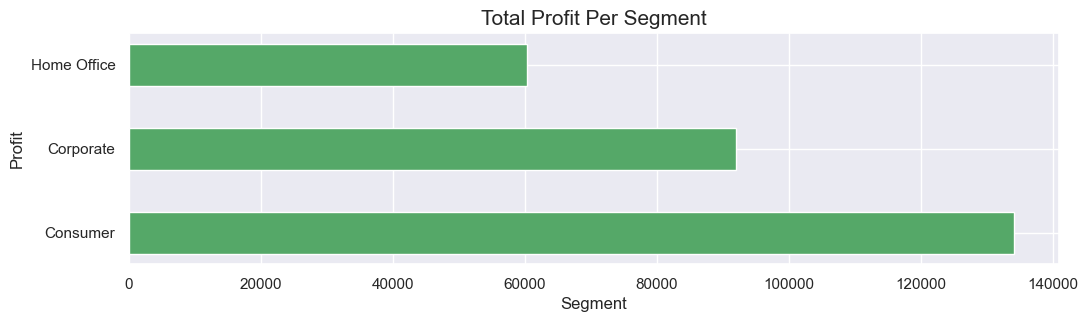

In [75]:
plt.figure(figsize=(12,3))
plt.barh(sales_profit_segment1['Segment'],sales_profit_segment1['DiscountedSales'], 
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('Total Discounted Sales Per Segment',fontdict={'fontsize':15})
plt.ylabel('DiscountedSales')
plt.xlabel('Segment')
plt.show()

plt.figure(figsize=(12,3))
plt.barh(sales_profit_segment1['Segment'],sales_profit_segment1['Profit'], 
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('Total Profit Per Segment',fontdict={'fontsize':15})
plt.ylabel('Profit')
plt.xlabel('Segment')
plt.show()

In [54]:
df2_avg = pd.DataFrame(df.groupby(['SubCategory'])[['DiscountedSales', 'Profit']].mean())

# Sort by descending order according to sales
sub_df2 = pd.DataFrame(df2_avg.sort_values('DiscountedSales', ascending = False))
sub_df2 = sub_df2.reset_index()
sub_df2.head(5)

,SubCategory,DiscountedSales,Profit
0,Copiers,2198.941618,817.909190
1,Machines,1645.553313,29.432669
2,Tables,648.794771,-55.565771
3,Chairs,532.739823,43.185430
4,Bookcases,503.859633,-15.230509


In [55]:
 # Sort by descending order according to profit
sub_profit_df2 = pd.DataFrame(sub_df2.sort_values('Profit', ascending = False))
sub_profit_df2 = sub_profit_df2.reset_index()
sub_profit_df2.head(5)

,index,SubCategory,DiscountedSales,Profit
0,0,Copiers,2198.941618,817.909190
1,9,Accessories,215.974604,54.111788
2,5,Phones,371.211534,50.073938
3,3,Chairs,532.739823,43.185430
4,8,Appliances,230.755710,38.922758


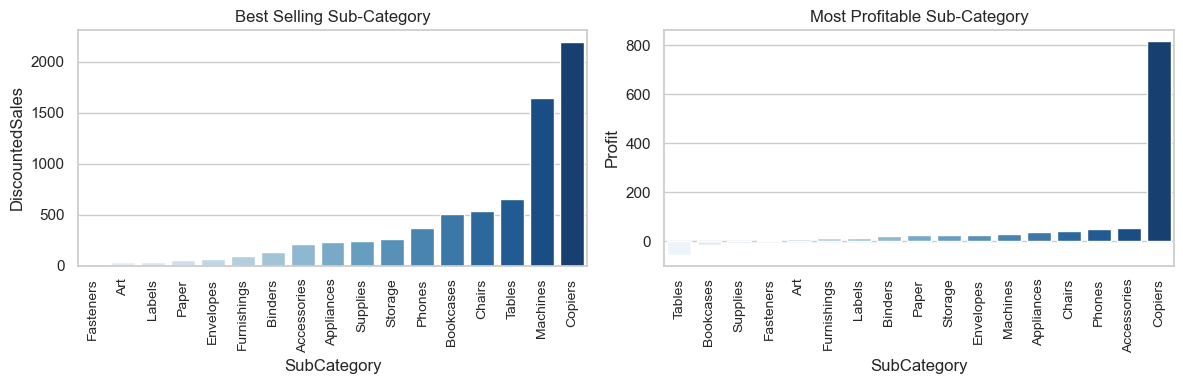

In [76]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(12, 4))
subcat1 = sns.barplot(data = sub_df2, x = sub_df2.SubCategory, y = sub_df2.DiscountedSales, ax=axis[0], palette = "Blues",
                      order=sub_df2.sort_values('DiscountedSales').SubCategory)


subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
subcat2 = sns.barplot(data = sub_profit_df2, x = sub_profit_df2.SubCategory, y = sub_profit_df2.Profit, ax=axis[1], 
                      palette = "Blues",order=sub_profit_df2.sort_values('Profit').SubCategory)


subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
figure.tight_layout()
plt.show()

**BEST PERFORMING CATEGORY**

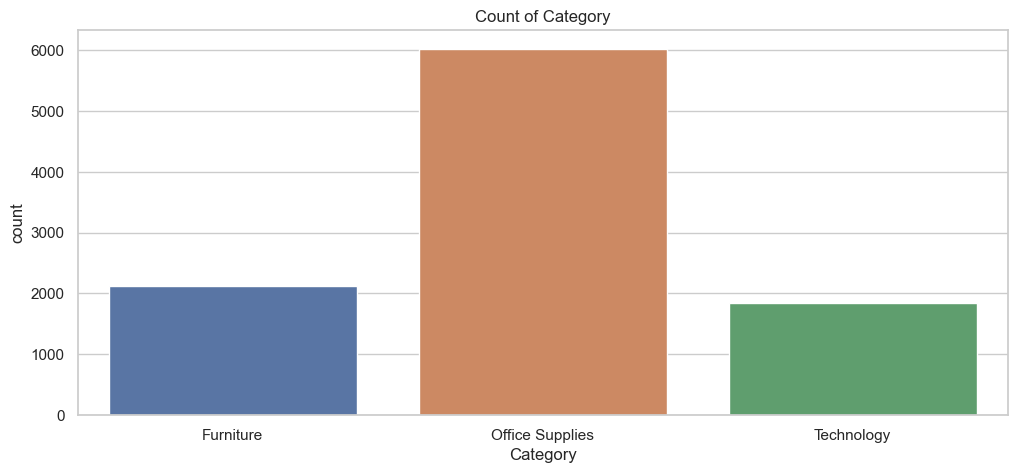

In [57]:
sns.countplot(x='Category', data = df)
plt.title('Count of Category')
plt.show() 

**BEST PERFORMING PRODUCT**

In [58]:
fur_entr=df[df['Category']=='Furniture']

In [59]:
fur_group=fur_entr.groupby(['Category', 'ProductName'])['Quantity'].sum().reset_index().sort_values('Quantity', 
                                                                                                    ascending = False)
fur_group=fur_group[['ProductName','Quantity']].set_index('ProductName')
fur_group

,Quantity
ProductName,
KI Adjustable-Height Table,74
"Situations Contoured Folding Chairs, 4/Set",64
Staple-based wall hangings,62
Chromcraft Round Conference Tables,61
Eldon Wave Desk Accessories,61
...,...
"Iceberg Nesting Folding Chair, 19w x 6d x 43h",0
"Iceberg OfficeWorks 42"" Round Tables",0
KI Adjustable-Height Table,0


<AxesSubplot: ylabel='Quantity'>

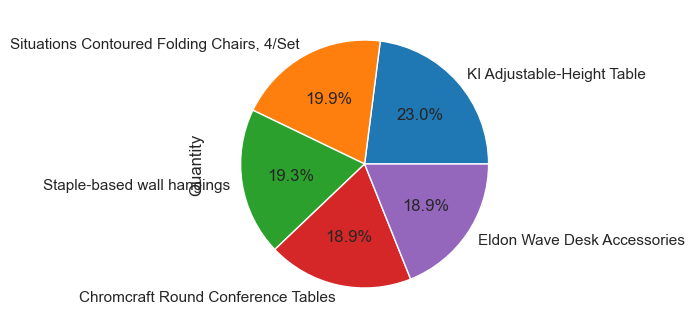

In [80]:
plt.figure(figsize=(4,8))
fur_group.head(5)['Quantity'].plot.pie(autopct="%1.1f%%",colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

- It is observed in the above line of code that people residing in Western part of US tend to order more from superstore.

**MONTHLY AND YEARLY ANALYSIS**

In [63]:
# Which month does the company records more sales?
month_sales_df = pd.DataFrame(df.groupby(['OrderMonth'])['DiscountedSales', 'Quantity', 'Profit', 'DiscountedAmount']
                              .mean().sort_values('DiscountedSales',ascending = False))
month_sales_df = month_sales_df.reset_index()
month_sales_df = month_sales_df.set_index('OrderMonth')
month_sales_df

C:\Users\sures\AppData\Local\Temp\ipykernel_20712\84070294.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  month_sales_df = pd.DataFrame(df.groupby(['OrderMonth'])['DiscountedSales', 'Quantity', 'Profit', 'DiscountedAmount']


,DiscountedSales,Quantity,Profit,DiscountedAmount
OrderMonth,,,,
March,294.548116,3.683908,41.084321,81.202257
January,249.146550,3.871391,23.974924,63.871586
October,244.594609,3.789988,38.808353,52.051960
November,239.606438,3.925901,24.111779,63.805642
December,231.032318,3.848722,30.801983,55.119763
August,225.274877,3.943343,30.845522,50.918494
September,222.451154,3.660159,26.650380,57.448947
June,212.996763,3.737796,29.687302,43.772818
May,210.923553,3.797279,30.491575,47.722392


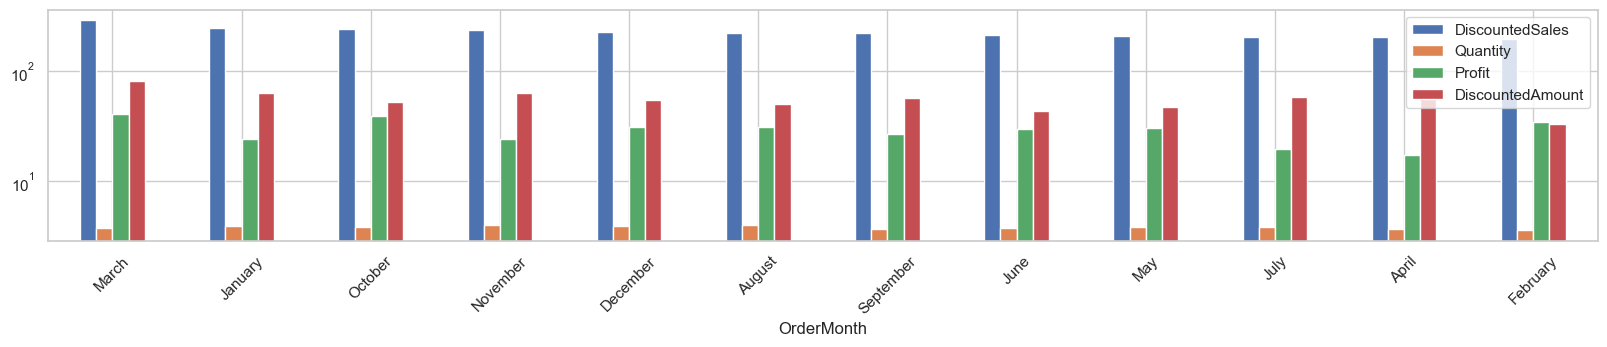

In [64]:
month_sales_df.plot(kind = 'bar', figsize = (20,3))
plt.xticks(rotation = 45)
plt.yscale('log')

**WHICH CUSTOMER SEGMENT IS THE MOST PROFITABLE?**

In [77]:
df4 = pd.DataFrame(df.groupby(['Segment'])[['Profit']].mean())
df4

,Profit
Segment,
Consumer,25.836873
Corporate,30.456667
Home Office,33.844409


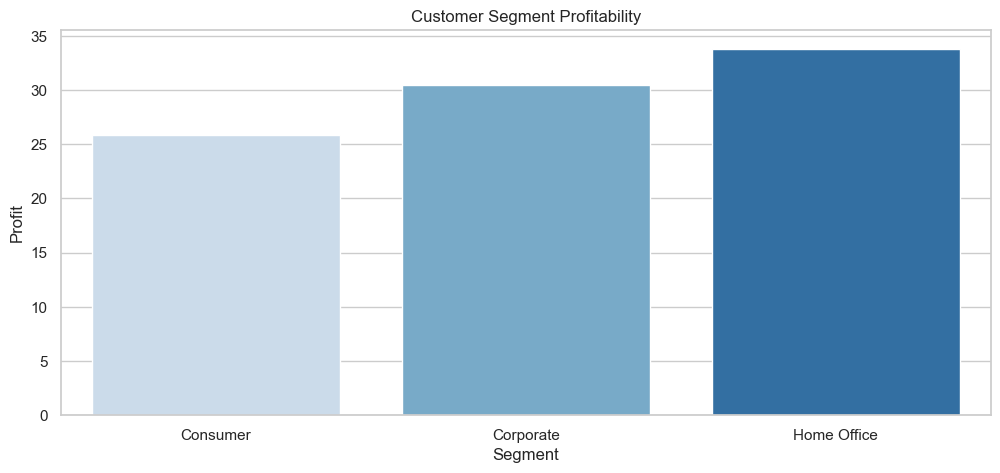

In [78]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df4, x = df4.index, y = df4.Profit, palette = "Blues")
plt.title("Customer Segment Profitability")
plt.show()

**WHICH IS THE PREFERRED SHIP MODE?**

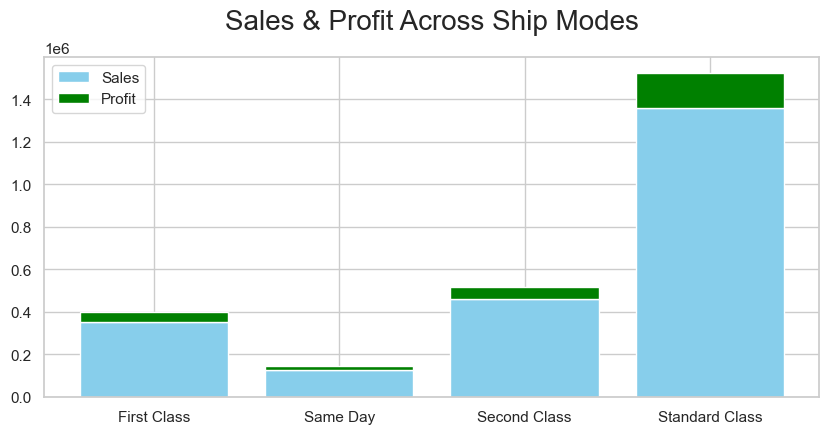

In [90]:
# Taking a subset of data (To keep things simple)
df_stackb = df[['ShipMode','DiscountedSales','Profit']]
# taking a groupby on category and then ship mode...
df_stackb = df_stackb.groupby(['ShipMode']).sum().reset_index()
# df_stackb

# Visualizing the Stacked BarChart
plt.figure(figsize=[10,15])
plt.subplot(3,1,1)
plt.bar(x=df_stackb['ShipMode'], height=df_stackb['DiscountedSales'], color='skyblue')
plt.bar(x=df_stackb['ShipMode'], height=df_stackb['Profit'], bottom=df_stackb['DiscountedSales'], color='green')
plt.title("Sales & Profit Across Ship Modes", size=20, pad=20)
plt.legend(['Sales','Profit'])

#### CUSTOMER REGIONAL ANALYSIS

In [67]:
region_analysis = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39706.3625
1,East,91534.8388
2,South,46749.4303
3,West,108418.4489


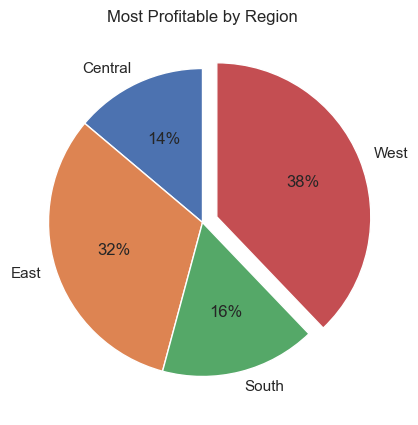

In [68]:
plt.pie(region_analysis.Profit, 
        labels = region_analysis.Region, 
        startangle = 90, autopct = "%1.0f%%", 
        explode = [0, 0, 0, 0.1])
plt.title("Most Profitable by Region")
plt.show()